In [47]:
import numpy as np 
from subprocess import Popen, PIPE, STDOUT
import os
import matplotlib.pyplot as plt
import galsim
import copy 
import treecorr
%pylab inline
from astropy.table import Table
import fitsio
import corner 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [48]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'
os.chdir(WLD)

### Read catalogs

In [49]:
#includes no cosmic shear. lsst chip. 
catalog1 = Table.read('lsst_i_1.fits', hdu=1)

### Gold sample analysis 

In [82]:
gold = catalog1[(catalog1['ab_mag'] < 25.3)] 
gold_bad = gold[(abs(gold['bias_g1']) > 1) | (abs(gold['bias_g2']) > 1) ]
catalog_bad = catalog1[(abs(catalog1['bias_g1']) > 1) | (abs(catalog1['bias_g2']) > 1) ]

### Get a corner plot

In [93]:
#convert catalog into suitable format for corner.py 
#leave relevant columns of the table. 
def for_corner(catalog):
    arr = []
    for i in range(len(gold_bad.columns[11:49])):
        arr.append(np.array(gold_bad.columns[11:49][i]))
    return (np.array(arr)).transpose()

In [107]:
print (gold_bad.columns[11:49])
print len(gold_bad.columns[11:])

<TableColumns names=('dx','dy','z','ab_mag','ri_color','flux','sigma_m','sigma_p','e1','e2','a','b','beta','psf_sigm','purity','snr_sky','snr_iso','snr_grp','snr_isof','snr_grpf','ds','dg1','dg2','bias_f','bias_s','bias_g1','bias_g2','bias_x','bias_y','bias_f_grp','bias_s_grp','bias_g1_grp','bias_g2_grp','bias_x_grp','bias_y_grp','ds_grp','dg1_grp','dg2_grp')>
43


In [75]:
np.array(gold_bad.columns[11:49])

IndexError: too many indices for array

In [ ]:
figure1 = plt.figure()
triangle.corner(np.array(points_plot).transpose(),
              bins=defaults.BINS_PULL,
              labels=plot_names,
              extents=extents,
              truths=truths, plot_contours=False,
              show_titles=True,
              fig=fish_figure)

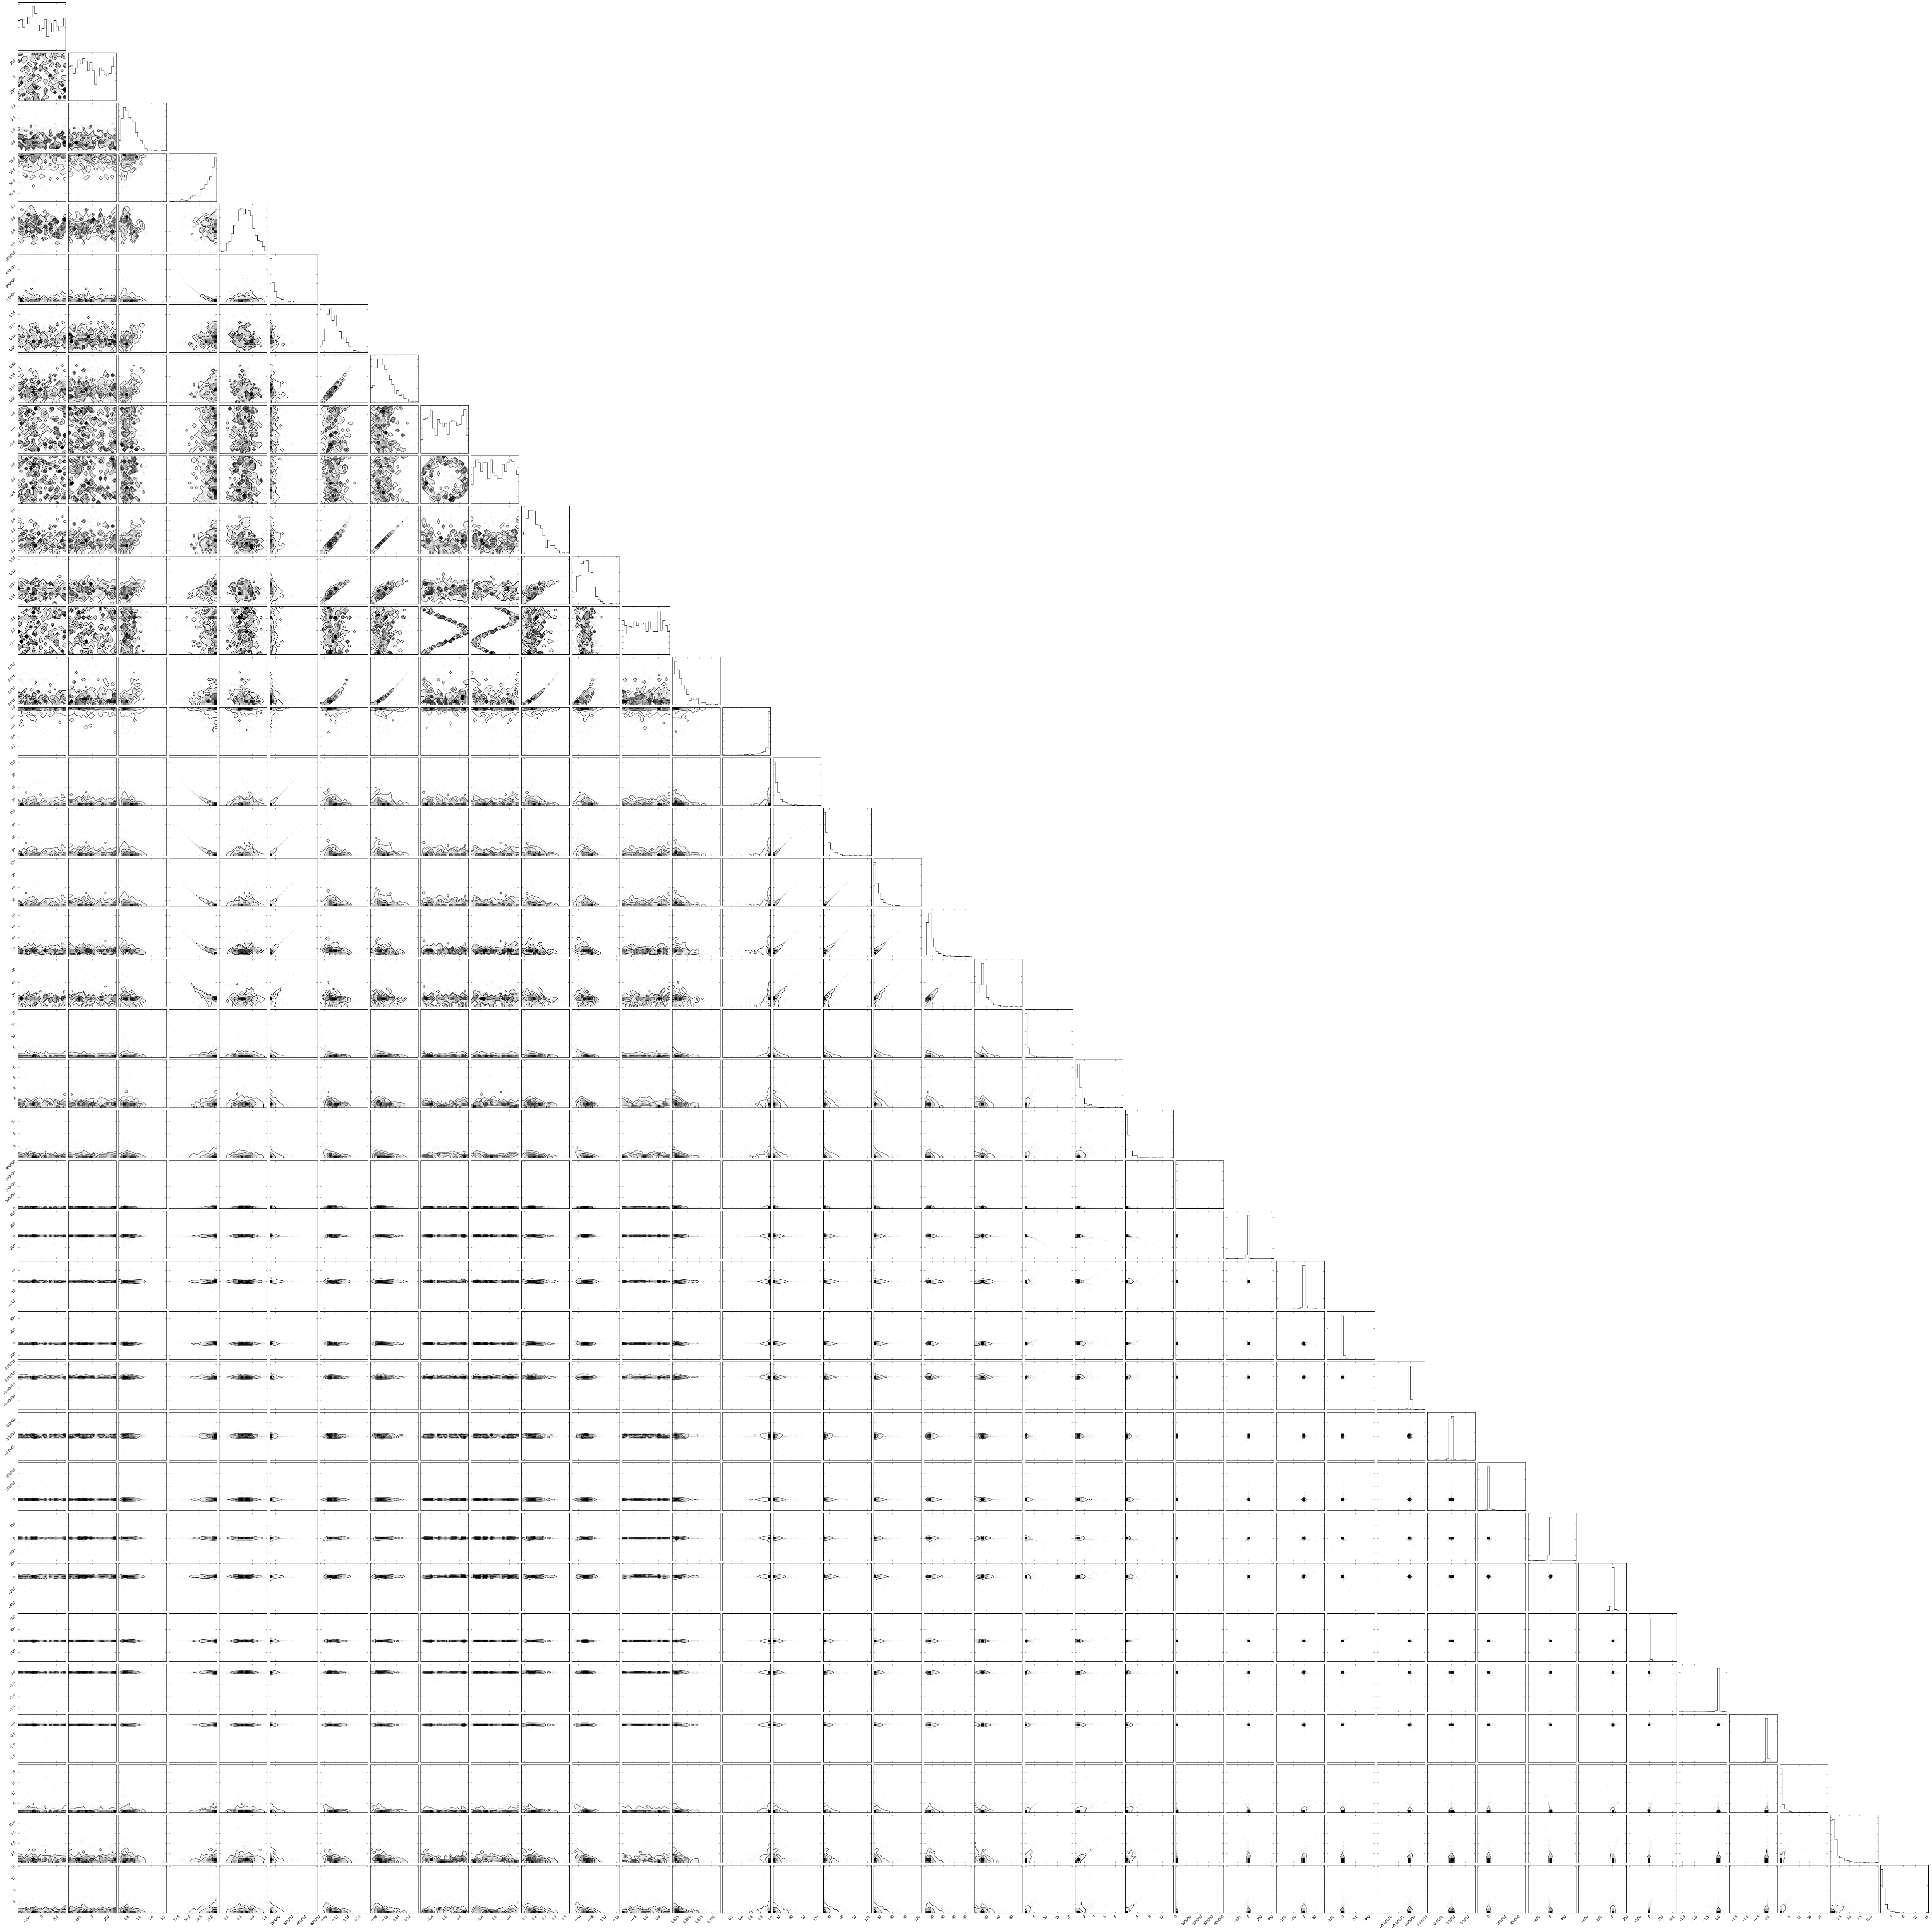

In [102]:
figure = corner.corner(arr)

In [106]:
figure.savefig('/Users/Ismael/Desktop/corner1.pdf')

### Look at other things 

In [123]:
plt.hist(np.sqrt(gold['e1']**2 + gold['e2']**2),histtype='step',normed=True, bins = 50)
plt.hist(np.sqrt(gold_bad['e1']**2 + gold_bad['e2']**2), histtype='step', normed=True,bins=50)

(array([ 0.53291241,  0.        ,  0.        ,  0.17763747,  0.        ,
         0.        ,  0.17763747,  0.        ,  0.17763747,  0.17763747,
         0.17763747,  0.17763747,  0.53291241,  0.35527494,  0.71054988,
         0.35527494,  0.17763747,  0.17763747,  0.35527494,  0.71054988,
         0.53291241,  0.53291241,  0.53291241,  0.88818736,  0.17763747,
         1.95401218,  0.88818736,  1.77637471,  1.77637471,  1.42109977,
         1.59873724,  2.13164965,  1.42109977,  2.13164965,  2.66456207,
         3.19747448,  3.01983701,  4.08566184,  3.19747448,  2.84219954,
         2.66456207,  3.73038689,  3.19747448,  6.21731149,  4.79621172,
         6.39494896,  6.03967402,  2.4869246 ,  4.26329931,  2.66456207]),
 array([ 0.07282697,  0.08470343,  0.09657989,  0.10845635,  0.12033281,
         0.13220928,  0.14408574,  0.1559622 ,  0.16783866,  0.17971512,
         0.19159158,  0.20346805,  0.21534451,  0.22722097,  0.23909743,
         0.25097389,  0.26285036,  0.27472682,  0

In [122]:
plt.scatter(catalog1['e1'],catalog1['e2'], alpha=.03)

In [3]:
#check if the whole catalog has this constrains? #have to wait for results. 
catalog1 = Table.read('OneDegSq.fits', hdu=1)

In [51]:
gold_bad

<Table length=474>
   db_id        grp_id    grp_size ...  hsm_e2    g1_fit       g2_fit   
   int64        int64      int16   ... float32   float32      float32   
------------ ------------ -------- ... ------- ------------ ------------
  2203569631   2200430763        6 ...     nan          0.0  2.98023e-09
  2203673441   2203673441        2 ...     nan   -0.0243088   -0.0243151
  2203101861   2200123265       10 ...     nan -0.000593086 -0.000122832
  2202699093   2200410677       11 ...     nan    0.0241025   -0.0186716
  2203352045   2200086219       46 ...     nan          0.0  2.98023e-09
  2203135708   2203135708        1 ...     nan          0.0          0.0
  2202612785   2202612785        5 ...     nan          0.0  2.98023e-09
  2202508347   2202508347        7 ...     nan    0.0550228    0.0406408
  2203620694   2200081633       38 ...     nan          0.0  2.98023e-09
  2202888436   2202888436        2 ...     nan  -0.00016851 -5.19739e-07
         ...          ...      ... ...     ...          ...          ...
402702200137 402700676376       16 ...     nan    -0.132838 -0.000628879
402703722937 402700035688       40 ...     nan          0.0   0.00829833
402704323802 402704323802        1 ...     nan          0.0          0.0
402703410605 402700957641        5 ...     nan          0.0  2.98023e-09
402703197756 402700465473        5 ...     nan   0.00769968   0.00127728
402702790878 402700104973       36 ...     nan          0.0  2.98023e-09
402701612827 402701612827        2 ...     nan          0.0  2.98023e-09
402702731548 402702731548        2 ...     nan  4.63356e-06   1.9795e-06
402702066219 402700329421       21 ...     nan -0.000142877 -0.000275836
402703600542 402703600542        3 ...     nan          0.0 -0.000448119

In [56]:
plt.scatter(np.sqrt(gold_bad['e1']**2 + gold_bad['e2']**2),gold_bad['snr_isof'], c=gold_bad['bias_g1'])
plt.colorbar()
plt.show()

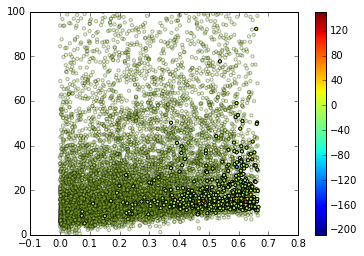

In [96]:
plt.scatter(np.sqrt(gold['e1']**2 + gold['e2']**2),gold['snr_isof'], c=gold['bias_g1'], alpha = .3, s= 10 )
plt.scatter(np.sqrt(gold_bad['e1']**2 + gold_bad['e2']**2),gold_bad['snr_isof'], c=gold_bad['bias_g1'], s = 10)
plt.ylim(0,100)
plt.colorbar()
plt.show()

In [83]:
plt.scatter(gold_bad['bias_g1'], gold_bad['bias_g2'])

In [89]:
plt.scatter(gold_bad['bias_g1'], gold_bad['bias_g2'], color='r')
plt.scatter(catalog_bad['bias_g1'], catalog_bad['bias_g2'], alpha=.1)
plt.xlim(-250,250)
plt.ylim(-400,600)

(-400, 600)

In [100]:
plt.hist(np.sqrt(gold_bad['bias_g1']**2 + gold_bad['bias_g2']**2), color='r', histtype='step', range=(0,50), bins=50)
plt.hist(np.sqrt(catalog_bad['bias_g1']**2 + catalog_bad['bias_g2']**2), color='b', histtype='step',range=(0,50),bins=50)

#looks like most of them are in the tail? 

(array([    0.,  2787.,  1924.,  1392.,   969.,   714.,   658.,   498.,
          444.,   412.,   366.,   327.,   261.,   271.,   229.,   206.,
          190.,   171.,   186.,   177.,   148.,   143.,   137.,   120.,
          115.,    97.,   113.,   109.,    92.,    92.,    91.,    74.,
           82.,    95.,    77.,    60.,    64.,    68.,    61.,    66.,
           66.,    61.,    75.,    58.,    69.,    62.,    60.,    48.,
           45.,    57.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.]),
 <a list of 1 Patch objects>)

In [113]:
h = np.sqrt(gold_bad['bias_g1']**2 + gold_bad['bias_g2']**2)
g = np.sqrt(catalog_bad['bias_g1']**2 + catalog_bad['bias_g2']**2)
print float(len(h[h <10]))/len(h)
print float(len(g[g <10]))/len(g)

0.827004219409
0.487535453053


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   5.00000000e+00,
          2.10000000e+01,   6.70000000e+01,   1.87000000e+02,
          4.66000000e+02,   1.06300000e+03,   2.30400000e+03,
          4.55100000e+03,   1.99200000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

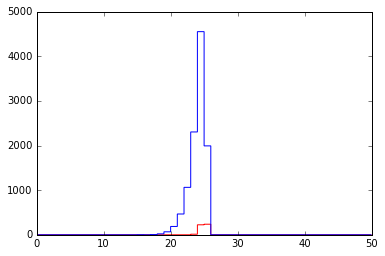

In [116]:
plt.hist(gold_bad['ab_mag'], color='r', histtype='step', range=(0,50), bins=50)
plt.hist(gold['ab_mag'], color='b', histtype='step',range=(0,50),bins=50)



In [126]:
print gold_bad['ab_mag'].mean()
print float(len(gold_bad[gold_bad['ab_mag'] > 24.5] ))/len(gold_bad)
print float(len(gold[gold['ab_mag'] > 24.5] ))/len(gold)

24.8959
0.864978902954
0.43310189529


In [118]:
len

<Table length=474>
   db_id        grp_id    grp_size ...  hsm_e2    g1_fit       g2_fit   
   int64        int64      int16   ... float32   float32      float32   
------------ ------------ -------- ... ------- ------------ ------------
  2203569631   2200430763        6 ...     nan          0.0  2.98023e-09
  2203673441   2203673441        2 ...     nan   -0.0243088   -0.0243151
  2203101861   2200123265       10 ...     nan -0.000593086 -0.000122832
  2202699093   2200410677       11 ...     nan    0.0241025   -0.0186716
  2203352045   2200086219       46 ...     nan          0.0  2.98023e-09
  2203135708   2203135708        1 ...     nan          0.0          0.0
  2202612785   2202612785        5 ...     nan          0.0  2.98023e-09
  2202508347   2202508347        7 ...     nan    0.0550228    0.0406408
  2203620694   2200081633       38 ...     nan          0.0  2.98023e-09
  2202888436   2202888436        2 ...     nan  -0.00016851 -5.19739e-07
         ...          ...      ... ...     ...          ...          ...
402702200137 402700676376       16 ...     nan    -0.132838 -0.000628879
402703722937 402700035688       40 ...     nan          0.0   0.00829833
402704323802 402704323802        1 ...     nan          0.0          0.0
402703410605 402700957641        5 ...     nan          0.0  2.98023e-09
402703197756 402700465473        5 ...     nan   0.00769968   0.00127728
402702790878 402700104973       36 ...     nan          0.0  2.98023e-09
402701612827 402701612827        2 ...     nan          0.0  2.98023e-09
402702731548 402702731548        2 ...     nan  4.63356e-06   1.9795e-06
402702066219 402700329421       21 ...     nan -0.000142877 -0.000275836
402703600542 402703600542        3 ...     nan          0.0 -0.000448119